In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import matplotlib.image as image

In [4]:
image_Size=256
Batch_Size=32
Channels=3
epochs=2

In [5]:
path="C:/Users/DELLS/Dropbox/Desktop/traoning/PlantVillage"

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
       path,
        shuffle=True,
        image_size=(image_Size,image_Size),
        batch_size=Batch_Size)

Found 2154 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names

In [8]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
68*32

2176

In [11]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 2 1 1 1 1 0 1 0]


In [12]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[124. 125. 143.]
  [103. 104. 122.]
  [164. 165. 183.]
  ...
  [188. 192. 204.]
  [157. 161. 173.]
  [175. 179. 191.]]

 [[ 94.  95. 113.]
  [142. 143. 161.]
  [124. 125. 143.]
  ...
  [176. 180. 192.]
  [177. 181. 193.]
  [210. 214. 226.]]

 [[133. 134. 152.]
  [173. 174. 192.]
  [142. 143. 161.]
  ...
  [182. 186. 198.]
  [176. 180. 192.]
  [180. 184. 196.]]

 ...

 [[107. 108. 128.]
  [104. 105. 125.]
  [ 89.  90. 110.]
  ...
  [132. 134. 155.]
  [122. 124. 145.]
  [107. 109. 130.]]

 [[118. 119. 139.]
  [100. 101. 121.]
  [ 75.  76.  96.]
  ...
  [127. 129. 150.]
  [122. 124. 145.]
  [137. 139. 160.]]

 [[115. 116. 136.]
  [109. 110. 130.]
  [ 96.  97. 117.]
  ...
  [156. 158. 179.]
  [127. 129. 150.]
  [128. 130. 151.]]]


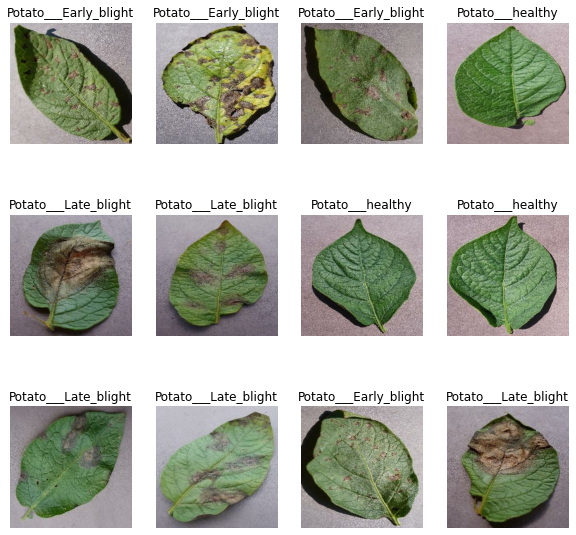

In [13]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [14]:
train_size=0.8
print(len(dataset)*train_size)

54.400000000000006


In [15]:
train_ds=dataset.take(54)
len(train_ds)

54

In [16]:
test_ds=dataset.skip(54)

In [17]:
len(test_ds)

14

In [18]:
val_size=0.1
print(len(dataset)*val_size)

6.800000000000001


In [19]:
validation=test_ds.take(6)
print(len(validation))

6


In [20]:
test_ds=test_ds.skip(6)
print(len(test_ds))

8


In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(image_Size, image_Size),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [28]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [29]:
input_shape = (Batch_Size, image_Size, image_Size, Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    batch_size=Batch_Size,
    validation_data=val_ds,
    verbose=1,
    epochs=21
)

Epoch 1/21
54/54 [==============================] - 240s 4s/step - loss: 0.9003 - accuracy: 0.5191 - val_loss: 0.9111 - val_accuracy: 0.6719
Epoch 2/21
54/54 [==============================] - 172s 3s/step - loss: 0.6195 - accuracy: 0.7355 - val_loss: 0.5339 - val_accuracy: 0.7760
Epoch 3/21
54/54 [==============================] - 201s 4s/step - loss: 0.3672 - accuracy: 0.8397 - val_loss: 0.3916 - val_accuracy: 0.8542
Epoch 4/21
54/54 [==============================] - 166s 3s/step - loss: 0.2961 - accuracy: 0.8796 - val_loss: 0.3013 - val_accuracy: 0.8750
Epoch 5/21
54/54 [==============================] - 172s 3s/step - loss: 0.2331 - accuracy: 0.9132 - val_loss: 0.2564 - val_accuracy: 0.8958
Epoch 6/21
54/54 [==============================] - 207s 4s/step - loss: 0.1719 - accuracy: 0.9375 - val_loss: 0.3231 - val_accuracy: 0.8802
Epoch 7/21
54/54 [==============================] - 206s 4s/step - loss: 0.1681 - accuracy: 0.9421 - val_loss: 0.1766 - val_accuracy: 0.9167
Epoch 8/21
54

In [33]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 639ms/step - loss: 0.0608 - accuracy: 0.9922


In [34]:
scores

[0.06084511801600456, 0.9921875]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 21, 'steps': 54}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
type(history.history['loss'])


list

In [39]:
len(history.history['loss'])


21

In [40]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.9002716541290283,
 0.619535505771637,
 0.36721283197402954,
 0.2960963547229767,
 0.23311103880405426]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (2,) and (21,)

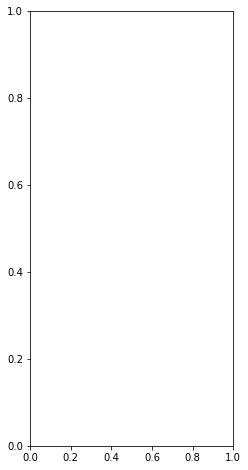

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 3s 3s/step
predicted label: Potato___Late_blight


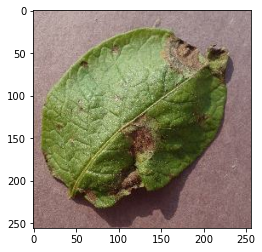

In [43]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 59ms/step


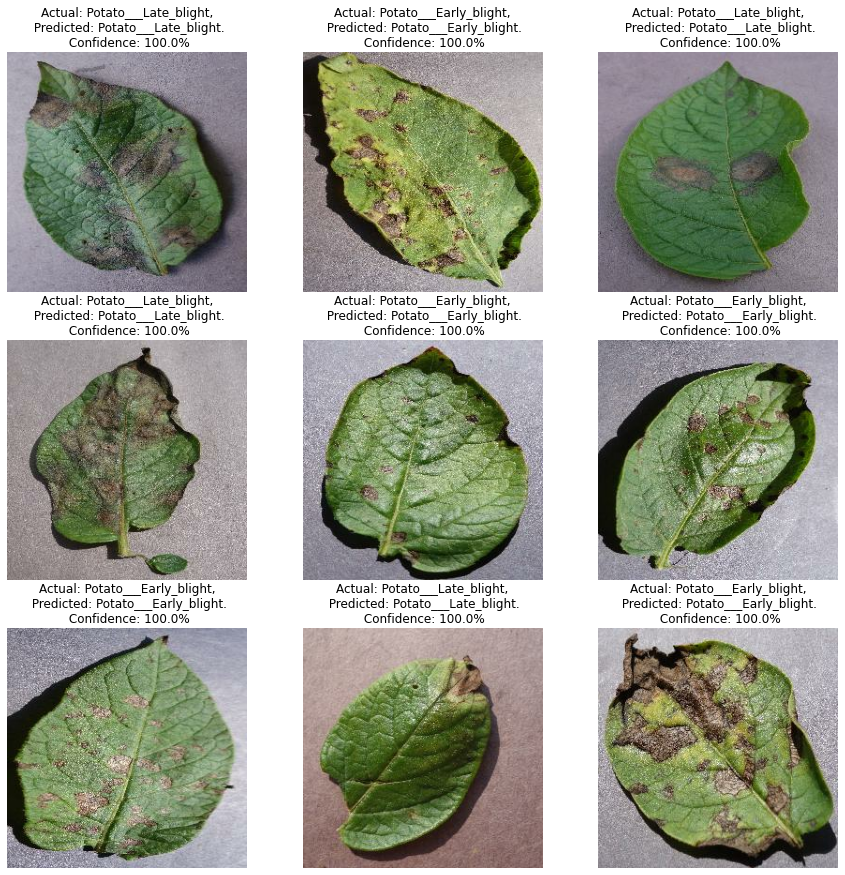

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [52]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/DELLS/Dropbox/Desktop/traoning/modal") + [0]])+1
model.save(f"C:/Users/DELLS/Dropbox/Desktop/traoning/modal{model_version}")

INFO:tensorflow:Assets written to: C:/Users/DELLS/Dropbox/Desktop/traoning/modal1\assets


INFO:tensorflow:Assets written to: C:/Users/DELLS/Dropbox/Desktop/traoning/modal1\assets


In [53]:
model.save("../potatoes.h5")